In [1]:
import logging
import numpy as np

import matplotlib.pyplot as plt

from ase.io import read
from pathlib import Path

from m_ff.interpolation import Spline1D, Spline3D
from m_ff.calculators import TwoBodySingleSpecies, ThreeBodySingleSpecies

logging.basicConfig(level=logging.INFO)

In [2]:
directory = Path('test/data/Fe_vac')

print('========== Load trajectory ==========')

filename = directory / 'movie.xyz'
traj = read(str(filename), index=slice(0, 5))

========== Load trajectory ==========


In [3]:
print('========== TwoBodySingleSpecies ==========')

# future: TwoBodySingleSpecies.from_json(directory / 'test.json')
# rs, element1, _, grid_data_1_1, _ = np.load(str(directory / 'MFF_2b_ntr_10_sig_1.00_cut_4.45.npy'))
# rs, element1, _, grid_data_1_1, _ = np.load(str(directory / 'MFF_2b_ntr_20_sig_1.00_cut_4.45.npy'))
rs, element1, _, grid_data_1_1, grid_data_1_1_1 = np.load(str(directory / 'MFF_2b_ntr_30_sig_1.00_cut_4.45.npy'))
grid_1_1 = Spline1D(rs, grid_data_1_1)

calc = TwoBodySingleSpecies(r_cut=3.7, grid_1_1=grid_1_1)

atoms = traj[0]
atoms.set_calculator(calc)

rms = np.sqrt(np.sum(np.square(atoms.arrays['force'] - atoms.get_forces()), axis=1))
print('MAEF on forces: {:.4f} +- {:.4f}'.format(np.mean(rms), np.std(rms)))
print(atoms.get_potential_energy())

print('========== Calculate MAEF for each steps ==========')

for atoms in traj:
    atoms.set_calculator(calc)

    rms = np.sqrt(np.sum(np.square(atoms.arrays['force'] - atoms.get_forces()), axis=1))
    print('MAEF on forces: {:.4f} +- {:.4f}'.format(np.mean(rms), np.std(rms)))
    print('energy: {}'.format(atoms.get_potential_energy()))

INFO:m_ff.calculators:numbers is in system_changes
INFO:m_ff.calculators:initialize


========== TwoBodySingleSpecies ==========
MAEF on forces: 1.2042 +- 0.5134
-698.7897857322324
========== Calculate MAEF for each steps ==========
MAEF on forces: 1.2042 +- 0.5134
energy: -698.7897857322324
MAEF on forces: 1.1927 +- 0.4985
energy: -698.7241578970682
MAEF on forces: 1.1818 +- 0.4840
energy: -698.6685543244188
MAEF on forces: 1.1721 +- 0.4696
energy: -698.6330988078504
MAEF on forces: 1.1658 +- 0.4554
energy: -698.6085236898538


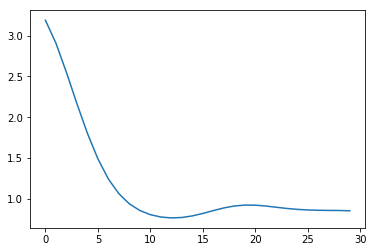

In [4]:
plt.plot(-grid_data_1_1)

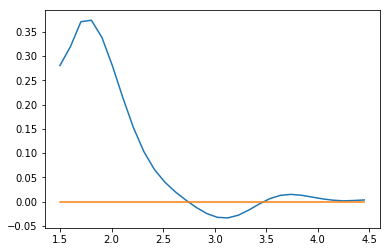

In [5]:
plt.plot(rs, np.gradient(grid_data_1_1, axis=0))
plt.plot(rs, np.zeros_like(rs))
plt.show()

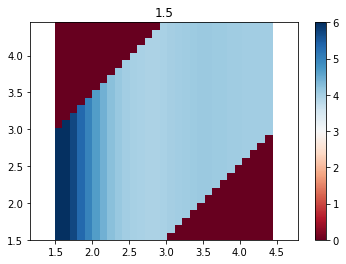

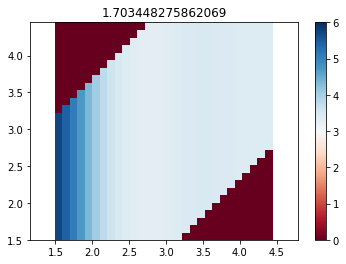

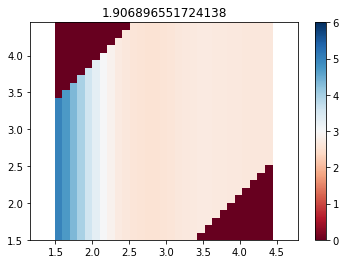

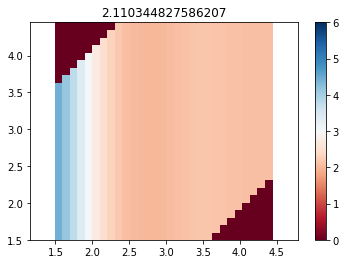

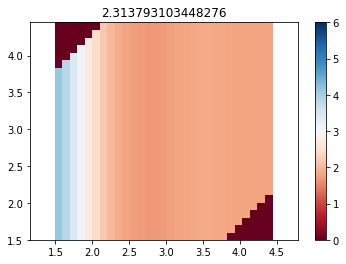

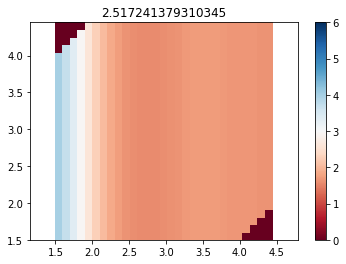

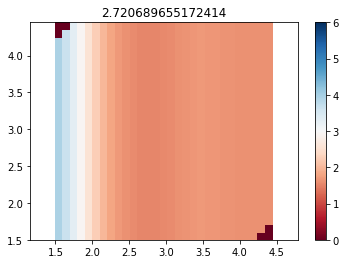

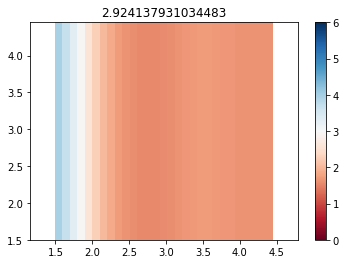

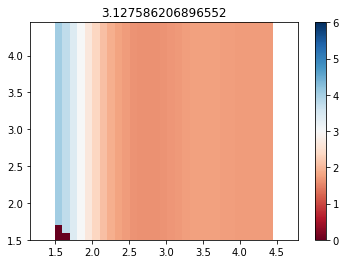

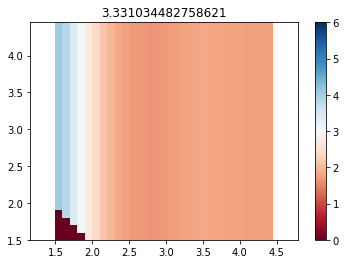

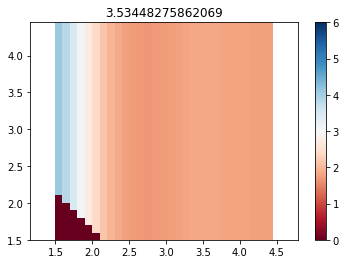

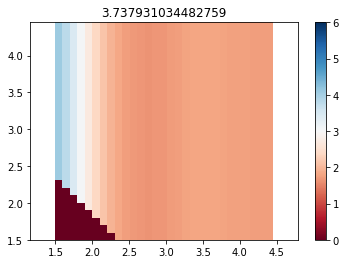

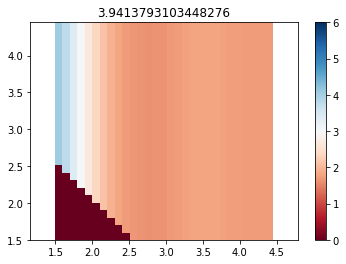

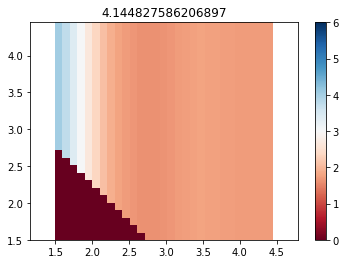

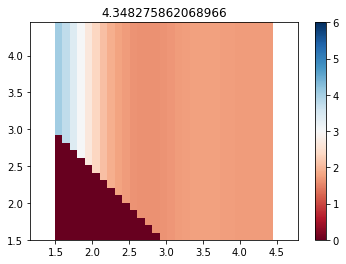

In [6]:
z_min, z_max = 0, 6
for i in range(0, len(rs), 2):
    plt.title(rs[i])
    plt.pcolor(rs, rs, -grid_data_1_1_1[i,:,:], cmap='RdBu', vmin=z_min, vmax=z_max)
    plt.colorbar()
    plt.axis('equal')

    plt.show()


In [7]:
print('========== ThreeBodySingleSpecies ==========')

# future: TwoBodySingleSpecies.from_json(directory / 'test.json')
# rs, element1, _, _, grid_data_1_1_1 = np.load(str(directory / 'MFF_3b_ntr_10_sig_1.00_cut_4.45.npy'))
rs, element1, _, _, grid_data_1_1_1 = np.load(str(directory / 'MFF_3b_ntr_20_sig_1.00_cut_4.45.npy'))
grid_1_1_1 = Spline3D(rs, rs, rs, grid_data_1_1_1)

calc = ThreeBodySingleSpecies(r_cut=3.7, grid_1_1_1=grid_1_1_1)

atoms = traj[0]
atoms.set_calculator(calc)

rms = np.sqrt(np.sum(np.square(atoms.arrays['force'] - atoms.get_forces()), axis=1))
print('MAEF on forces: {:.4f} +- {:.4f}'.format(np.mean(rms), np.std(rms)))
print(atoms.get_potential_energy())

print('========== Calculate MAEF for each steps ==========')

for atoms in traj:
    atoms.set_calculator(calc)

    rms = np.sqrt(np.sum(np.square(atoms.arrays['force'] - atoms.get_forces()), axis=1))
    print('MAEF on forces: {:.4f} +- {:.4f}'.format(np.mean(rms), np.std(rms)))
    print('energy: {}'.format(atoms.get_potential_energy()))


INFO:m_ff.calculators:numbers is in system_changes
INFO:m_ff.calculators:initialize


========== ThreeBodySingleSpecies ==========
MAEF on forces: 82460.7472 +- 35603.8817
2905106.355425914
========== Calculate MAEF for each steps ==========
MAEF on forces: 82460.7472 +- 35603.8817
energy: 2905106.355425914
MAEF on forces: 81603.0771 +- 38472.0366
energy: 2916482.086216846
MAEF on forces: 81517.2225 +- 38519.9173
energy: 2913256.3958221003
MAEF on forces: 81418.0889 +- 38584.2406
energy: 2910011.553464438
MAEF on forces: 81310.2322 +- 38647.8092
energy: 2906773.0471959733


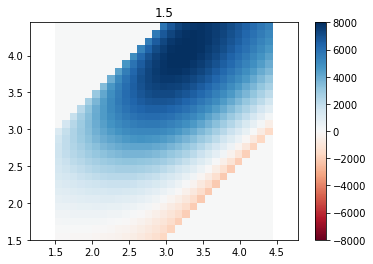

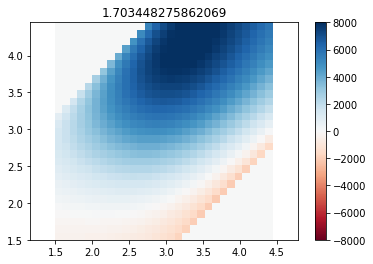

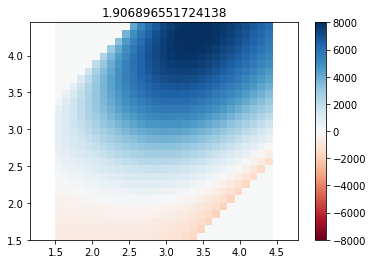

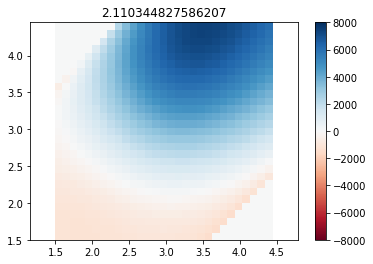

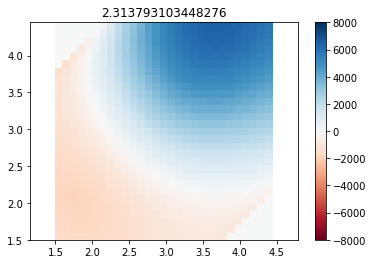

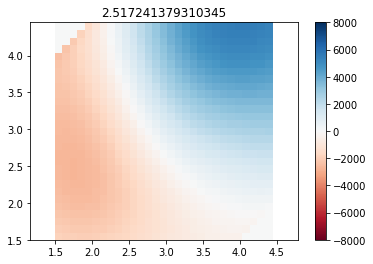

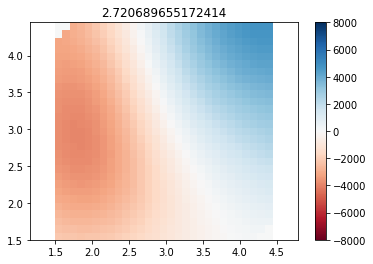

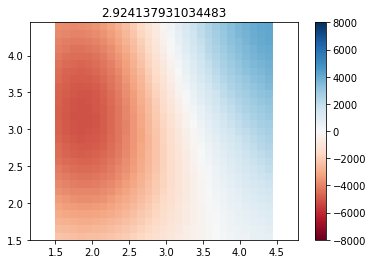

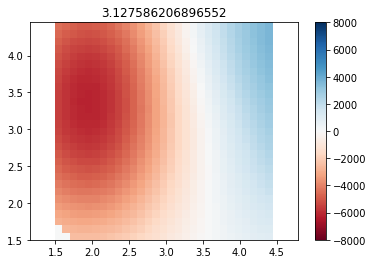

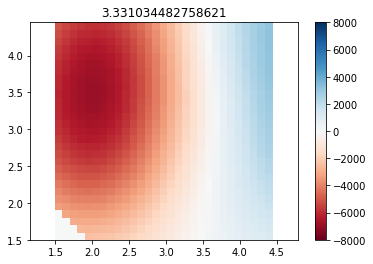

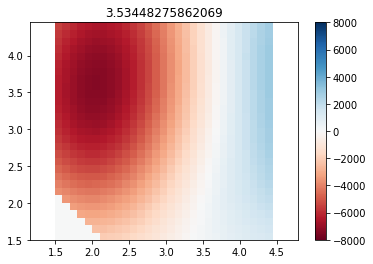

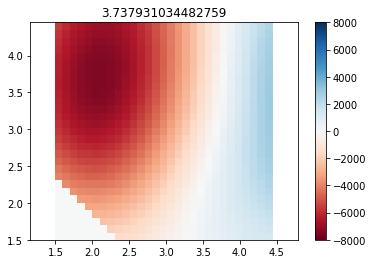

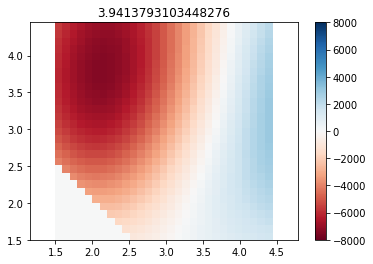

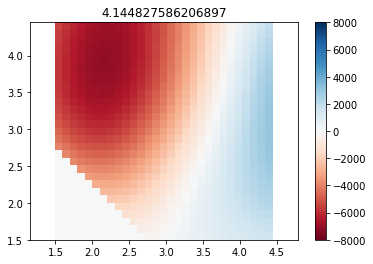

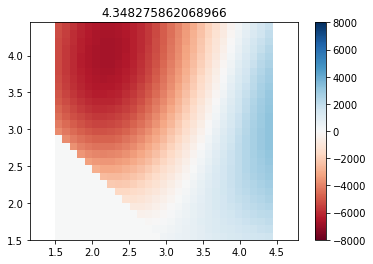

In [8]:
z_min, z_max = -8000, 8000
for i in range(0, len(rs), 2):
    plt.title(rs[i])
    plt.pcolor(rs, rs, -grid_data_1_1_1[i,:,:], cmap='RdBu', vmin=z_min, vmax=z_max)
    plt.colorbar()
    plt.axis('equal')

    plt.show()
